In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]] # petal length, petal width
y = iris.target

print('Class labels:',np.unique(y))

Class labels: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# evenly divide training set with same ratio (stratify)
print('Labels counts in y:',np.bincount(y))
print('Labels counts in y_train:',np.bincount(y_train))
print('Labels counts in y_test:',np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)# not on the test set (do not cheat!)
# calculate mean and standard deviation

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training a perceptron via scikit-learn

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40,eta0=0.1, random_state=1)
ppn.fit(X_train_std,y_train)
y_train

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [7]:
y_pred = ppn.predict(X_test_std)
print(y_pred)
print('Misclassified samples: %d' %(y_test != y_pred).sum())

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 0 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
Misclassified samples: 1


In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f'%accuracy_score(y_test,y_pred))
print('Accuracy: %.3f'%ppn.score(X_test_std,y_test))

Accuracy: 0.978
Accuracy: 0.978


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=f'Class {cl}', edgecolor='black')
        
    if test_idx:
        X_test,y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='none',edgecolor='black',alpha=1.0,linewidth=1,marker='o',s=100,label='Test set')

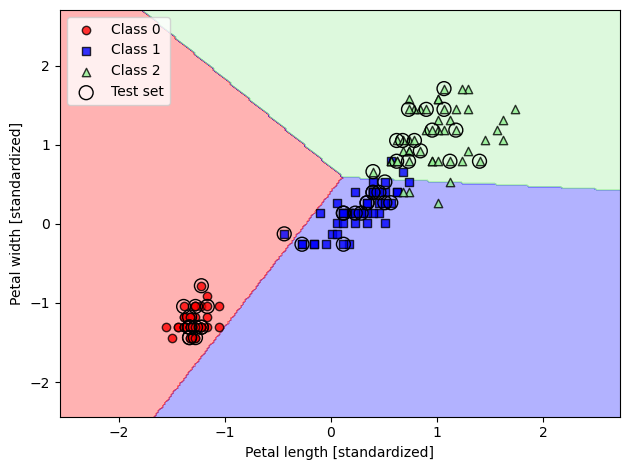

In [12]:
X_combined_std = np.vstack((X_train_std,X_test_std))#vertically stack two arrays
y_combined = np.hstack((y_train,y_test))#horizontally stack two arrays

plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Model class probabilities via logistic regression

### Logistic regression intuition and conditional proabilities

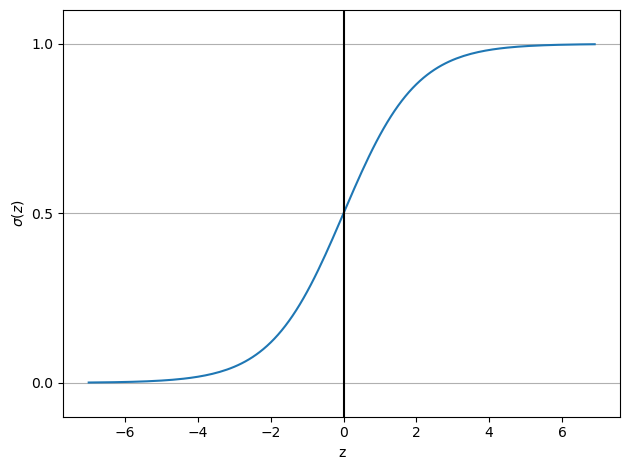

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
sigma_z = sigmod(z)

plt.plot(z,sigma_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

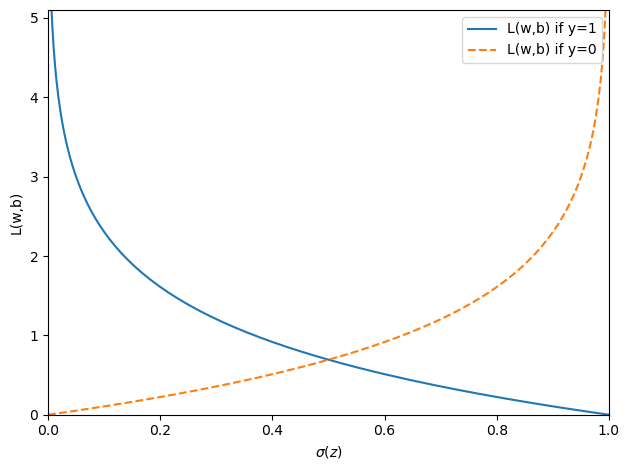

In [18]:
def loss_1(z):
    return -np.log(sigmoid(z))
def loss_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10,10,0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z,c1,label='L(w,b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z,c0,linestyle='--',label='L(w,b) if y=0')

plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w,b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Training a logistic regression model with gradient descent

In [19]:
class LogisticRegressionGD:
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.1,size=X.shape[1])
        self.b_ = np.float_(0.0)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1-y).dot(np.log(1-output)))/X.shape[0]
            self.losses_.append(loss)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_
    
    def activation(self,z):
        return 1./(1. + np.exp(-np.clip(z,-250,250)))
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.5, 1, 0)


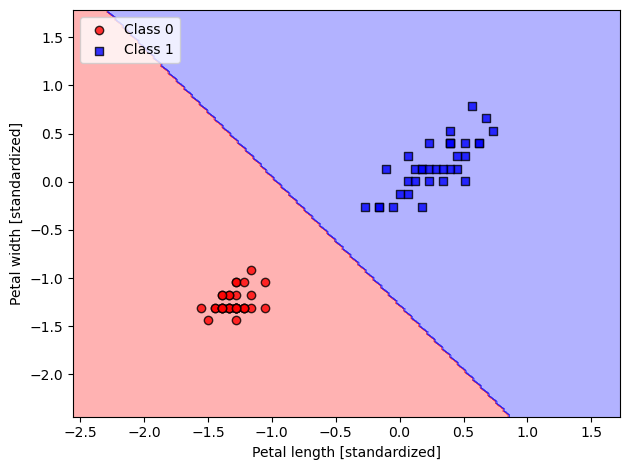

In [21]:
X_train_01_subset = X_train_std[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]

lrgd = LogisticRegressionGD(eta=0.3,n_iter=1000,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Training a logistic regression model with scikit-learn

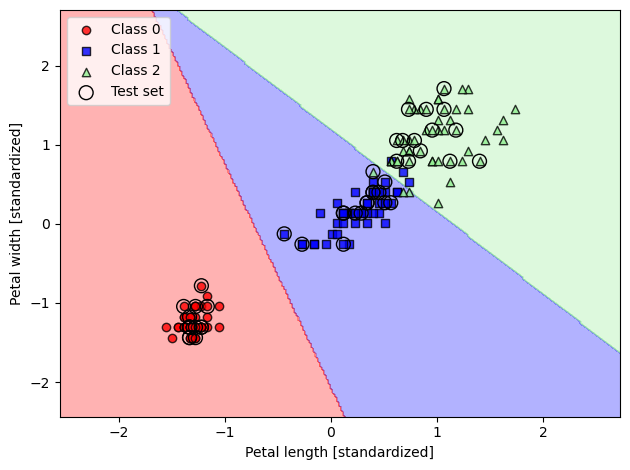

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0,solver='lbfgs',multi_class='ovr') # ovr: binary problem
lr.fit(X_train_std,y_train)

plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
lr.predict_proba(X_test_std[:3,:])#classification prob for each classes

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [32]:
lr.predict_proba(X_test_std[:3,:]).sum(axis=1) # to verify sum of probs are 1

array([1., 1., 1.])

In [26]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1) # get index of maximum proh = class

array([2, 0, 0])

In [27]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

### Tackling overfitting via regularization

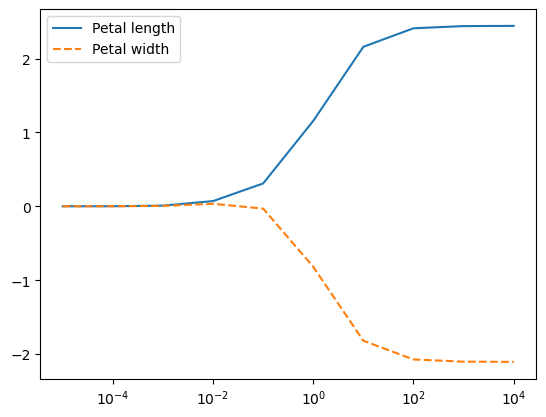

In [33]:
weights, params = [], []

for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c,multi_class='ovr')
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)


weights = np.array(weights)
plt.plot(params,weights[:,0],label='Petal length')
plt.plot(params,weights[:,1],linestyle='--',label='Petal width')
plt.ylabel=('Weight coefficient')
plt.xlabel=('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()